In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2010.csv', dtype = {'fips': str})
climate_2010 = ur_files.compute()
climate_2010 = climate_2010.loc[:, ~climate_2010.columns.str.contains('^Unnamed')]
climate_2010.head()

,fips,county,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,SuicideDeathRate
0,01001,Autauga,75.264706,64.593699,9.560274,4.142192,0.111501,0.123288,0.383562,0.016438,0.0,0.164384,64.818067,63.799518,11.1,2.0,3,21.989701
1,01003,Baldwin,12.427907,66.487853,NaN,6.121469,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,10.2,6.0,5,17.008202
2,01005,Barbour,94.311111,64.356164,9.168908,3.013425,0.000000,0.071233,0.482192,0.063014,0.0,0.194521,63.358387,63.469625,11.3,0.0,5,19.900101
3,01007,Bibb,162.637500,62.069315,8.890137,3.209041,0.152356,0.054795,0.301370,0.027397,0.0,0.139726,64.984348,61.030511,11.0,2.0,2,13.975058
4,01009,Blount,243.931250,58.765205,NaN,3.766301,0.150329,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,12.1,7.0,2,19.189840


In [4]:
climate_2010 = climate_2010[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone', 'rurality','SuicideDeathRate']]

In [5]:
climate_2010 = climate_2010.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2010.iloc[:, 1:-1].values
y = climate_2010.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.22288004, 0.05864056, 0.063294  , 0.09661104, 0.0353448 ,
       0.04285482, 0.04617515, 0.05104279, 0.00148049, 0.04857968,
       0.07131115, 0.05913739, 0.09159022, 0.04838914, 0.06266871])

In [10]:
len(rf.feature_importances_)

15

In [11]:
columns = climate_2010.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'PM2.5',
 'Ozone',
 'rurality']

In [13]:
len(columns)

15

Text(0.5, 0, 'Random Forest Feature Importance')

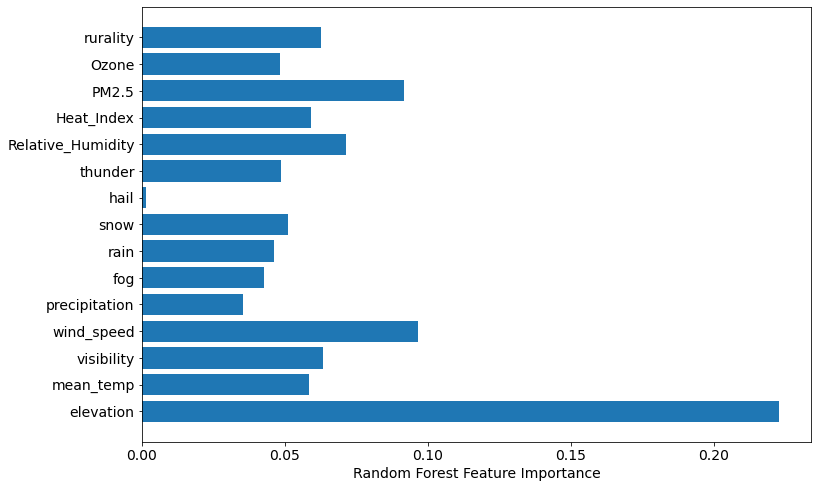

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8,  4,  5,  6, 13,  9,  7,  1, 11, 14,  2, 10, 12,  3,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00148049, 0.0353448 , 0.04285482, 0.04617515, 0.04838914,
       0.04857968, 0.05104279, 0.05864056, 0.05913739, 0.06266871,
       0.063294  , 0.07131115, 0.09159022, 0.09661104, 0.22288004])

Text(0.5, 0, 'Random Forest Feature Importance')

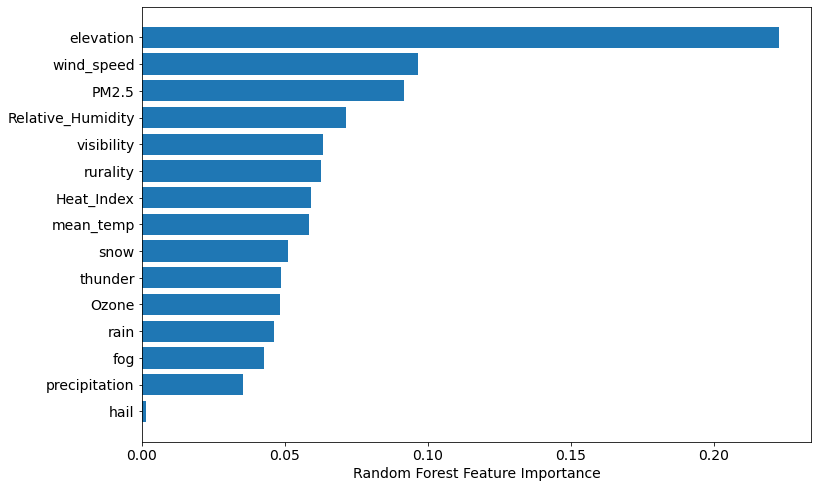

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

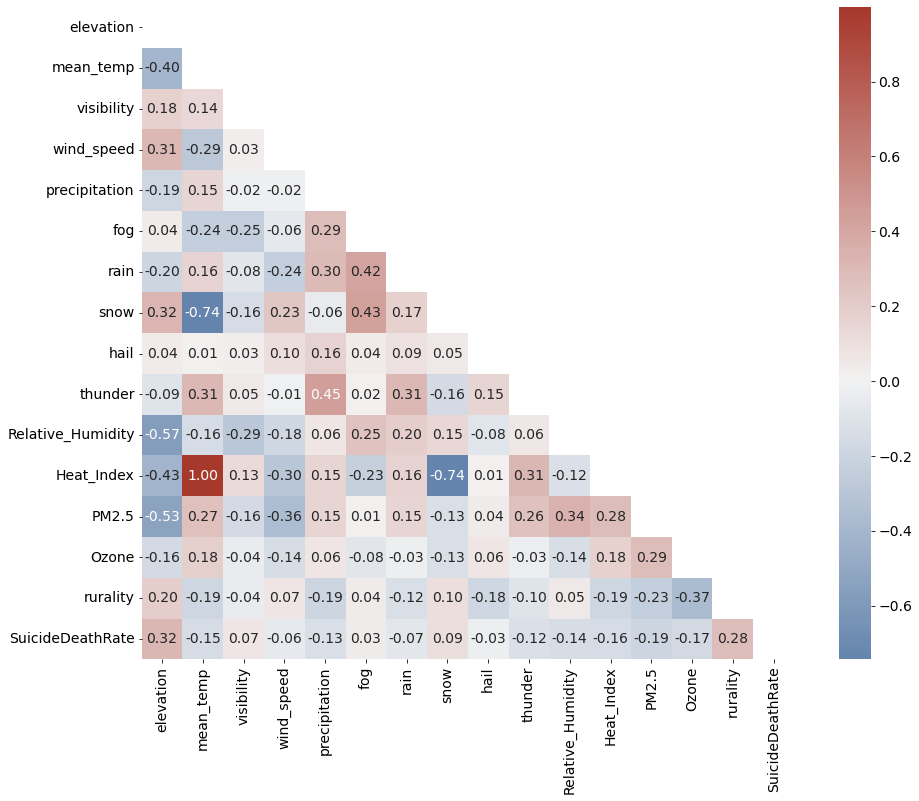

In [21]:
correlation_matrix(climate_2010)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2010.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2010 = ur_files.compute()
social_2010 = social_2010.loc[:, ~social_2010.columns.str.contains('^Unnamed')]
social_2010.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,72083,6417.0,0.594633,0.530730,0.001300,0.159590,0.378257,0.113138,0.010056,0.127412,0.953927,0.256696,0.996160,NaN,0.015360,0.252896,"Las Marías Municipio, PR",NaN
1,72125,8066.0,0.497617,0.376497,0.000000,0.234554,0.368010,0.055822,0.042038,0.168181,0.947168,0.233214,0.987221,NaN,0.013640,0.345630,"San Germán Municipio, PR",NaN
2,72045,6755.0,0.560694,0.445225,0.000000,0.206069,0.407717,0.093977,0.010595,0.118086,0.944393,0.264959,0.993790,NaN,0.001300,0.386628,"Comerío Municipio, PR",NaN
3,72029,9852.0,0.425071,0.321700,0.000000,0.160223,0.340493,0.072559,0.012545,0.113593,0.951937,0.276177,0.998876,NaN,0.002863,0.358777,"Canóvanas Municipio, PR",NaN
4,72117,8768.0,0.516478,0.432781,0.003158,0.140625,0.387784,0.033975,0.088909,0.165165,0.959094,0.232849,0.919226,NaN,0.000132,0.410815,"Rincón Municipio, PR",NaN


In [23]:
social_2010['SuicideDeathRate'].isna().sum()

105

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2010 = social_2010.dropna(how = 'any')

In [25]:
social_2010.shape

(806, 18)

In [26]:
X = social_2010.iloc[:, 1:-2].values
y = social_2010.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.04722304, 0.04849787, 0.03729207, 0.21609467, 0.06487726,
       0.04209796, 0.08651579, 0.04878733, 0.08101756, 0.07748839,
       0.05567808, 0.05979834, 0.04526106, 0.05114178, 0.03822879])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2010.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2010.shape

(806, 18)

In [32]:
climate_2010.shape

(2705, 17)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

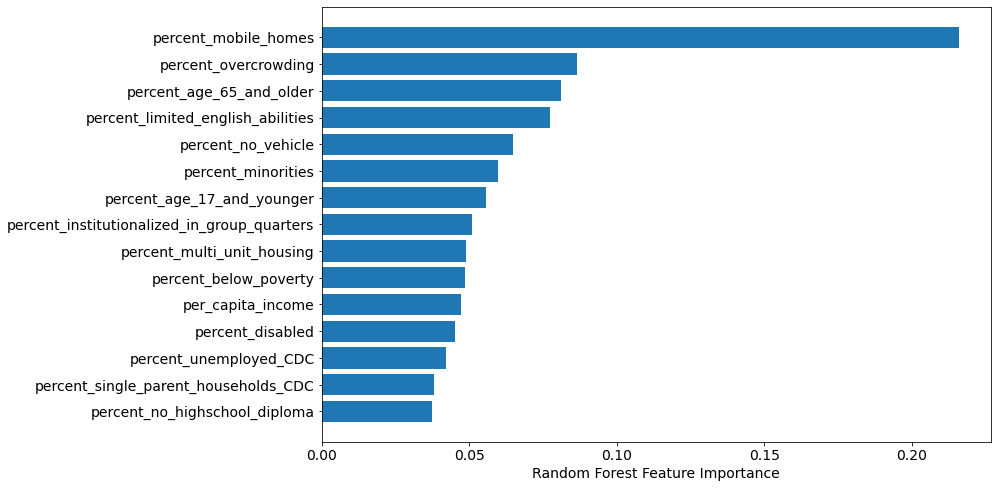

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

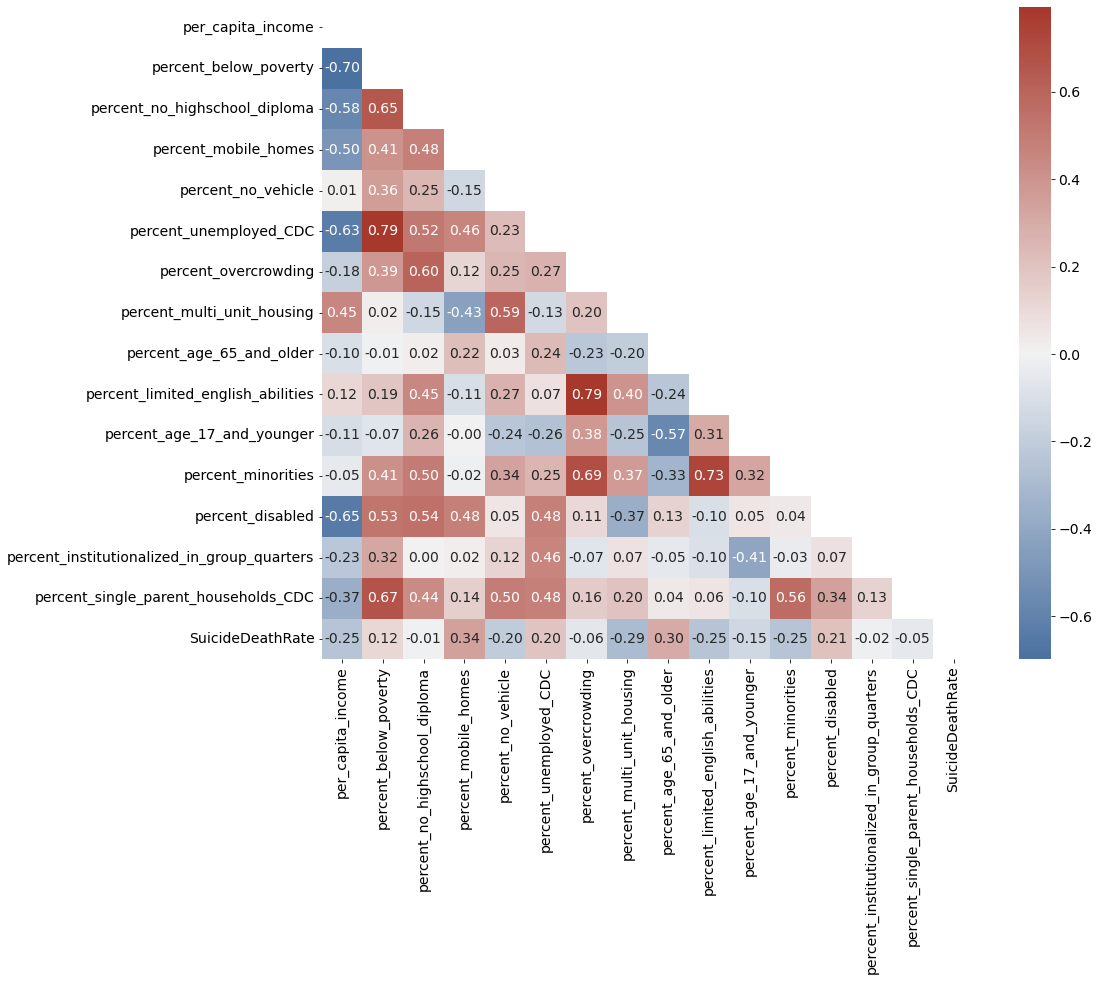

In [36]:
correlation_matrix(social_2010)

## find the rank of importances of all factors

In [37]:
df_total = social_2010.merge(climate_2010, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality
1,06053,25776.0,0.139343,0.308630,0.040025,0.063619,0.230747,0.108896,0.095907,0.104446,...,0.080189,0.250000,0.000000,0.0,0.000000,74.175197,53.834630,4.5,0.0,3.0
2,06055,34310.0,0.099556,0.185783,0.047861,0.053559,0.190136,0.061998,0.079439,0.149354,...,0.153425,0.254795,0.005479,0.0,0.000000,75.186155,54.219256,8.1,2.0,4.0
3,06057,30727.0,0.089909,0.060889,0.054706,0.038541,0.217866,0.025451,0.027870,0.185800,...,0.317808,0.265753,0.232877,0.0,0.000000,49.011733,47.202456,5.7,22.0,5.0
4,06059,34017.0,0.101477,0.174462,0.027479,0.046529,0.193313,0.091292,0.184261,0.111910,...,0.046575,0.186301,0.000000,0.0,0.016438,60.491504,62.646251,10.2,6.0,1.0
5,06061,35680.0,0.065996,0.073213,0.022094,0.037792,0.190890,0.016964,0.064100,0.147900,...,0.317808,0.265753,0.232877,0.0,0.000000,49.011733,47.202456,6.6,28.0,2.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone',
       'rurality'], dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'PM2.5',
       'Ozone', 'rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(737, 33)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,Heat_Index,fog,rain,snow,hail,thunder,PM2.5,Ozone,rurality,SuicideDeathRate
1,06053,"Monterey County, CA",0.139343,25776.0,0.230747,0.308630,0.104446,0.268728,0.327430,0.212356,...,53.834630,0.080189,0.250000,0.000000,0.0,0.000000,4.5,0.0,3.0,10.841884
2,06055,"Napa County, CA",0.099556,34310.0,0.190136,0.185783,0.149354,0.232971,0.502156,0.187902,...,54.219256,0.153425,0.254795,0.005479,0.0,0.000000,8.1,2.0,4.0,12.455672
3,06057,"Nevada County, CA",0.089909,30727.0,0.217866,0.060889,0.185800,0.200466,0.464468,0.233320,...,47.202456,0.317808,0.265753,0.232877,0.0,0.000000,5.7,22.0,5.0,13.162691
4,06059,"Orange County, CA",0.101477,34017.0,0.193313,0.174462,0.111910,0.249905,0.411694,0.188985,...,62.646251,0.046575,0.186301,0.000000,0.0,0.016438,10.2,6.0,1.0,9.467709
5,06061,"Placer County, CA",0.065996,35680.0,0.190890,0.073213,0.147900,0.248302,0.463303,0.167631,...,47.202456,0.317808,0.265753,0.232877,0.0,0.000000,6.6,28.0,2.0,15.785003


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.02210662, 0.03191759, 0.02736328, 0.0120179 , 0.046145  ,
       0.0289682 , 0.0228639 , 0.02472708, 0.06749796, 0.05446612,
       0.0573415 , 0.12350188, 0.03101309, 0.03181476, 0.03230588,
       0.0846146 , 0.01300129, 0.02300434, 0.01923228, 0.03526131,
       0.0289803 , 0.01249571, 0.01316662, 0.01979506, 0.01203996,
       0.0015492 , 0.0165517 , 0.07784801, 0.01945829, 0.0089506 ])

In [47]:
len(rf.feature_importances_)

30

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'PM2.5',
 'Ozone',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

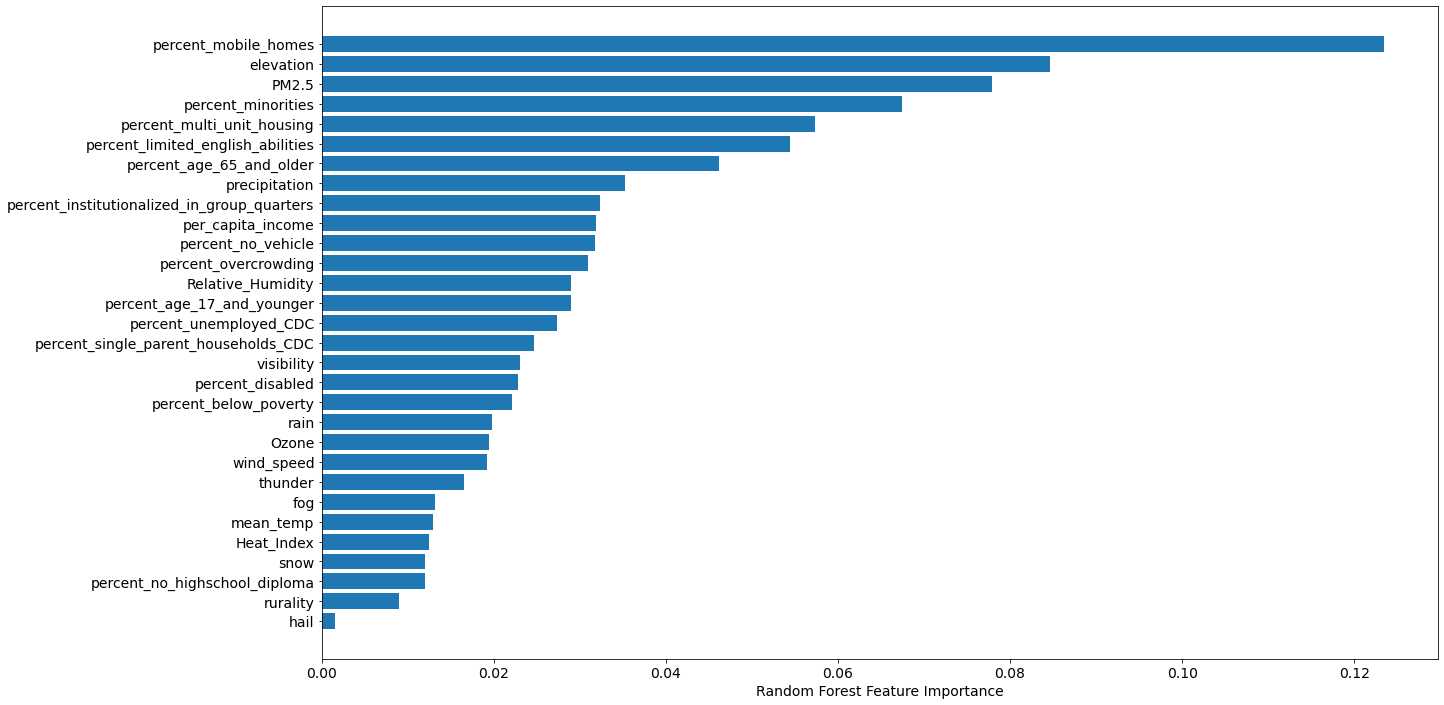

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [52]:
import xgboost
import shap

In [53]:
X = climate_2010.iloc[:, 1:-1]
y = climate_2010.iloc[:, -1].array

In [54]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


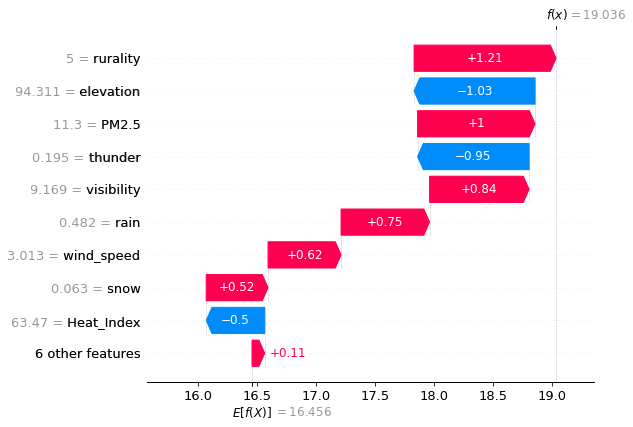

In [55]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

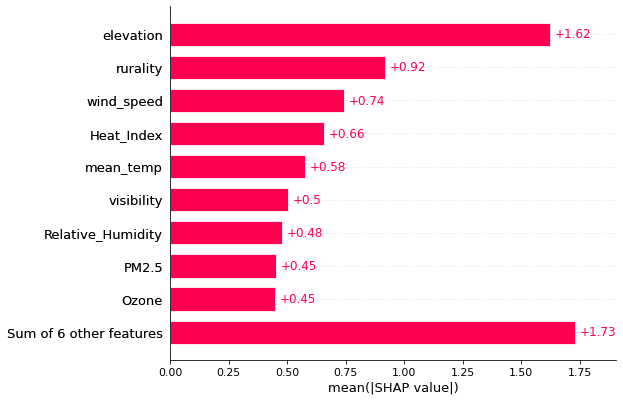

In [56]:
shap.plots.bar(shap_values)

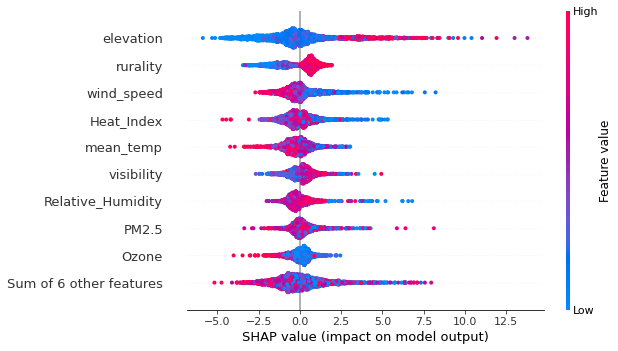

In [57]:
shap.plots.beeswarm(shap_values)

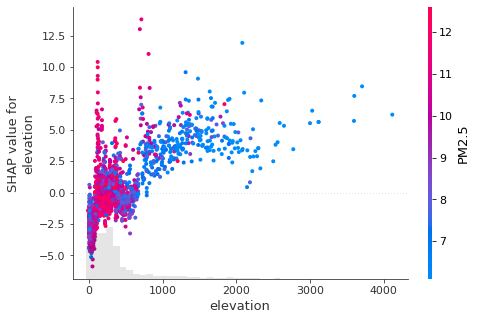

In [58]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

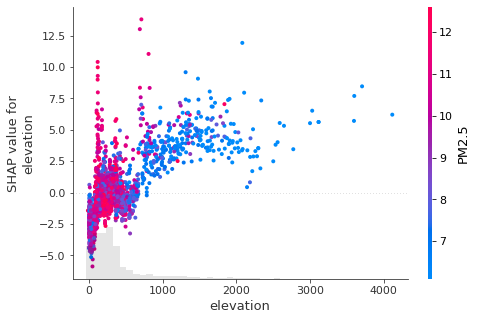

In [59]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"PM2.5"])

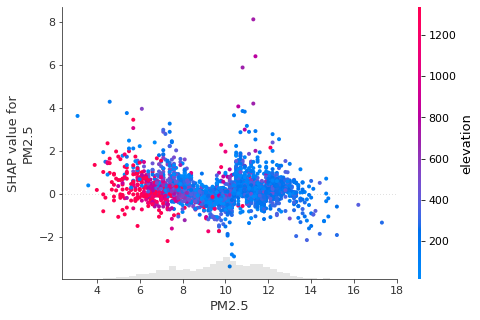

In [60]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"elevation"])

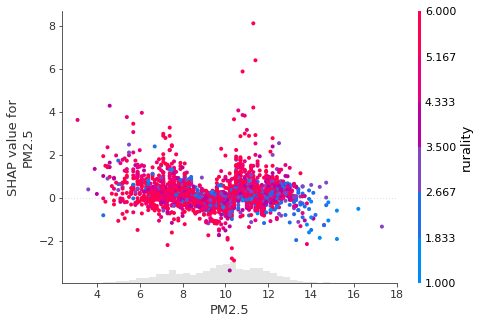

In [61]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"rurality"])

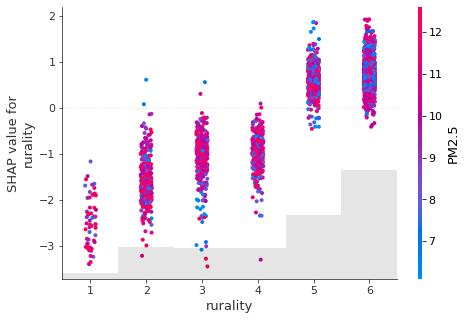

In [62]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

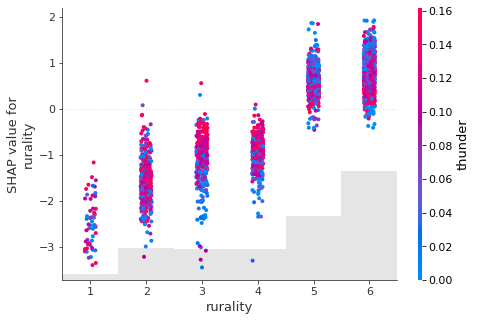

In [63]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

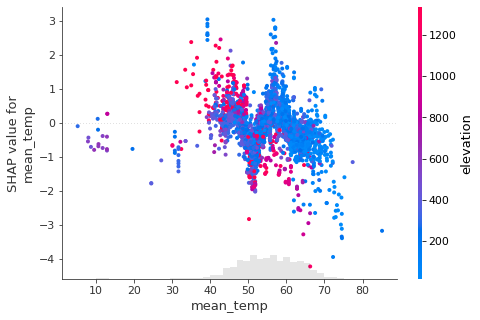

In [64]:
shap.plots.scatter(shap_values[:,"mean_temp"], color=shap_values)

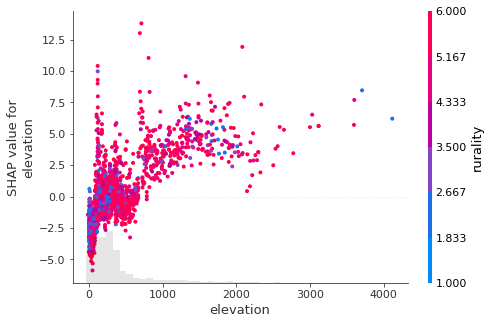

In [65]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

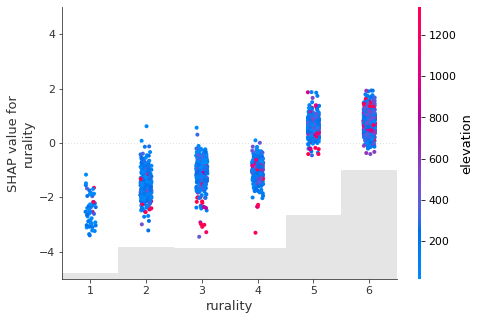

In [65]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"], ymin = -5, ymax = 5)

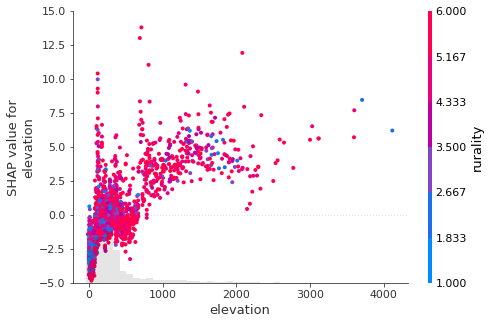

In [66]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

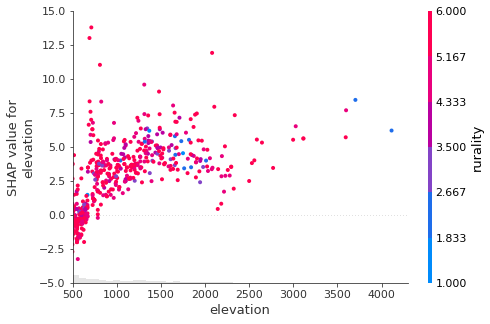

In [67]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"], xmin = 500, ymin = -5, ymax = 15)

### social economic factors

In [82]:
social_2010.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
15,06047,18041.0,0.218217,0.349936,0.050807,0.079010,0.282026,0.087707,0.041257,0.090292,0.502396,0.321553,0.669297,0.668948,0.014152,0.204076,"Merced County, CA",10.164469
18,06053,25776.0,0.139343,0.308630,0.040025,0.063619,0.230747,0.108896,0.095907,0.104446,0.503165,0.268728,0.657528,0.327430,0.042900,0.212356,"Monterey County, CA",10.841884
19,06055,34310.0,0.099556,0.185783,0.047861,0.053559,0.190136,0.061998,0.079439,0.149354,0.324041,0.232971,0.417319,0.502156,0.040805,0.187902,"Napa County, CA",12.455672
20,06057,30727.0,0.089909,0.060889,0.054706,0.038541,0.217866,0.025451,0.027870,0.185800,0.063934,0.200466,0.127360,0.464468,0.008077,0.233320,"Nevada County, CA",13.162691
21,06059,34017.0,0.101477,0.174462,0.027479,0.046529,0.193313,0.091292,0.184261,0.111910,0.426643,0.249905,0.544835,0.411694,0.013705,0.188985,"Orange County, CA",9.467709


In [83]:
X = social_2010.iloc[:, 1:-2]
y = social_2010.iloc[:, -1].array

In [84]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


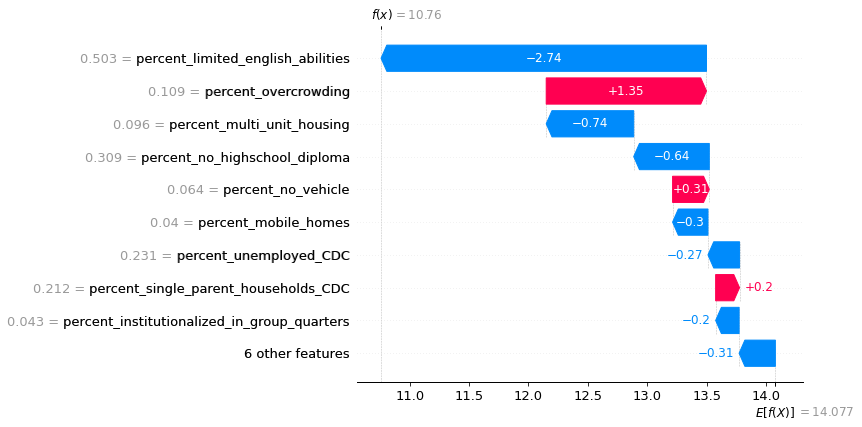

In [85]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

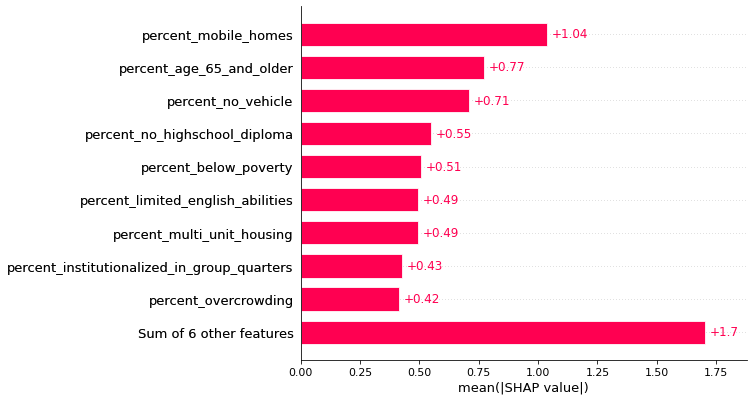

In [86]:
shap.plots.bar(shap_values)

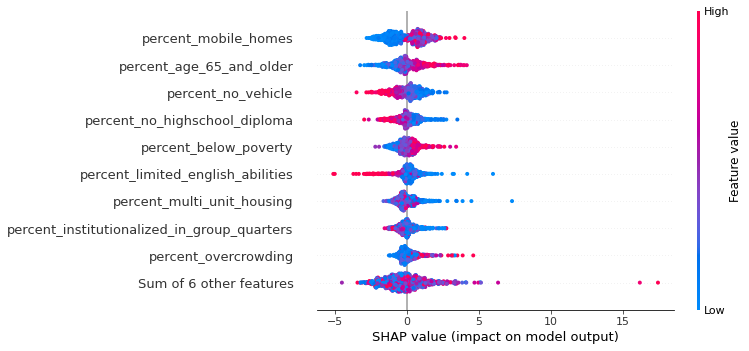

In [87]:
shap.plots.beeswarm(shap_values)

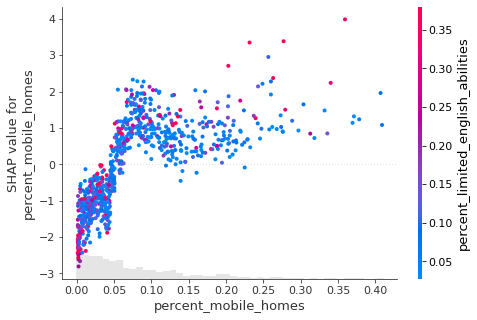

In [88]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)